In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import tensorflow as tf
import  matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
  

In [4]:
df = pd.read_csv('drive/My Drive/creditcard.csv')
del df["Time"]
df["Amount"] = (df['Amount'] - df["Amount"].min()) / (df["Amount"].max() - df["Amount"].min())

In [56]:
X=df.copy()

y=df.copy()


del X["Class"]
y=y["Class"]
y = np.expand_dims(y, axis=1)
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


In [6]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
y_train_res = np.expand_dims(y_train_res, axis=1)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038, 1) 

After OverSampling, counts of label '1': [199019]
After OverSampling, counts of label '0': [199019]


# Adding Noise

In [7]:
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [85443,29]) 
noise

array([[-3.99369517e-03,  3.96855365e-02,  1.22430146e-01, ...,
        -7.07570657e-02, -2.49160731e-04,  1.09982682e-01],
       [ 1.07193180e-01, -1.01919961e-01,  8.61340039e-02, ...,
        -6.58572720e-02, -9.91254800e-03,  9.81212578e-02],
       [ 1.18035674e-02,  2.17220140e-02, -1.01763859e-01, ...,
        -2.87419424e-02, -1.43839539e-02, -5.50686712e-02],
       ...,
       [ 9.15865827e-02,  6.48259614e-02,  3.08670201e-02, ...,
        -1.46275995e-01,  1.05284082e-01,  3.82560800e-02],
       [ 8.13704439e-02,  1.74183409e-02,  7.83337917e-02, ...,
        -1.31044237e-02, -7.52983362e-02, -6.70841106e-02],
       [ 3.25255125e-02,  2.23839378e-01,  2.82003145e-02, ...,
        -1.33258669e-01, -2.68860632e-01,  7.98757078e-02]])

In [8]:
X_test_noised=X_test+noise

In [9]:
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [398038,29]) 
noise

array([[ 0.09183353,  0.04813275, -0.1781389 , ...,  0.09032972,
         0.01360453, -0.25236357],
       [-0.11734328,  0.1067214 ,  0.01334409, ...,  0.09943952,
        -0.04491182, -0.02428252],
       [ 0.00437857, -0.17279003, -0.14139576, ..., -0.07921396,
         0.0304119 ,  0.00738559],
       ...,
       [-0.09006916, -0.00267877,  0.07180701, ..., -0.06936189,
         0.21048218,  0.01694734],
       [ 0.08508896, -0.01005091,  0.03051534, ..., -0.06489634,
        -0.14630629, -0.0552525 ],
       [ 0.09859083,  0.00713319,  0.06113417, ...,  0.0398645 ,
         0.09814688,  0.04487116]])

In [10]:
X_train_noised=X_train_res+noise
X_train_noised

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.040233,0.155176,-0.828727,-0.908096,1.867161,1.715066,0.394194,0.518403,-0.007456,-0.406768,...,0.049187,-0.004373,-0.054936,0.257175,-2.449861,-0.934902,0.350715,0.396724,0.088421,-0.250500
1,2.008651,0.120929,-1.501416,0.147342,0.578221,-0.533415,0.284032,-0.331836,0.381134,0.056911,...,0.005733,-0.324299,-0.817544,0.235099,-0.080708,-0.100663,0.302066,0.031172,-0.102589,-0.024205
2,-0.082315,-0.006550,1.431731,0.629696,0.292864,0.999583,1.570783,-1.170394,0.926935,1.396253,...,0.060038,-0.156684,1.143826,-0.391286,0.718955,-0.155155,-0.518926,-1.280785,-1.109519,0.014007
3,1.457717,-0.500714,0.546456,-0.558051,-1.339225,-0.736388,-0.662244,-0.033613,-0.606932,0.710559,...,-0.042574,-0.214188,-0.148230,0.105649,0.376725,0.070696,-0.504941,-0.042265,0.147310,-0.007792
4,-1.655295,0.644871,0.472586,-0.541589,0.994624,-0.556879,1.017592,-0.029689,-0.018236,-0.950691,...,-0.186478,-0.395155,-0.213143,-0.147439,0.434901,0.662545,0.511047,-0.101815,0.178837,-0.099660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398033,-5.100789,4.393215,-8.587447,7.720440,-1.193499,-2.238615,-3.822539,0.651024,-1.444117,-2.341286,...,-0.222377,0.624925,0.627402,0.416224,-0.541608,-0.152104,0.410339,-2.817218,0.397347,-0.057664
398034,-4.443925,4.256769,-7.227480,7.023988,-5.821067,-2.559270,-10.344123,3.112685,-5.686498,-11.227345,...,1.263105,2.298398,0.683194,-0.328036,0.607158,0.011696,0.231549,2.078471,0.657942,0.103012
398035,-5.319365,5.164445,-8.236613,8.031248,-7.203602,-1.978265,-8.785764,3.374066,-6.512564,-11.082843,...,1.037178,2.220027,0.303908,0.061149,0.633155,-0.022662,0.244398,1.799201,0.962661,0.028692
398036,-28.971474,16.103859,-29.882803,6.363077,-21.207770,-4.991076,-19.612315,18.995133,-3.691439,-7.938920,...,1.677202,1.796889,-2.133031,-1.044728,0.319944,2.002295,-0.239272,1.213704,0.224632,-0.051360


In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_recall_curve
from sklearn.preprocessing import MinMaxScaler 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Dense,Flatten
from tensorflow.keras.models import Model, Sequential,model_from_json
from tensorflow.keras import regularizers

In [11]:
# Building the Input Layer
input_layer = Input(shape =(X.shape[1], ))

# Building the Encoder network
encoded = Dense(22, activation ='leaky_relu')(input_layer)
encoded = Dense(15, activation ='leaky_relu')(input_layer)
# Building the Decoder network
decoded = Dense(10, activation ='leaky_relu')(encoded)
decoded = Dense(15, activation ='leaky_relu')(decoded)
decoded = Dense(22, activation ='leaky_relu')(decoded)

# Building the Output Layer
output_layer = Dense(X.shape[1], activation ='leaky_relu')(decoded)


In [ ]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="Adam", loss ="mse")
  
# Training the Auto-encoder network
autoencoder.fit(X_train_noised, X_train_res, batch_size = 32, epochs = 60, verbose=1, validation_data=(X_test_noised, X_test))

In [17]:
X_train_denoised = autoencoder.predict(X_train_noised)
X_test_denoised=autoencoder.predict(X_test_noised)

2671/2671 [==============================] - 4s 1ms/step


In [130]:
model_json = autoencoder.to_json()
with open("drive/My Drive/autoencoder.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("drive/My Drive/autoencoder.h5")

In [13]:
# load json and create model
json_file = open('drive/My Drive/autoencoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
# load weights into new model
autoencoder.load_weights("drive/My Drive/autoencoder.h5")
print("Loaded model from disk")

Loaded model from disk


In [15]:
y_test = y_test[:, 0]
y_test = np.array([y_test == 0, y_test == 1], dtype=np.float32)
y_test = np.transpose(y_test)

In [25]:

y_train_res = y_train_res[:, 0]
y_train_res = np.array([y_train_res == 0, y_train_res == 1], dtype=np.float32)
y_train_res = np.transpose(y_train_res)

In [19]:
import tensorflow as tf

# Building the Classifier network
model = Sequential()
model.add(Dense(22, input_dim=29, activation='leaky_relu'))
model.add(Dense(15, activation='leaky_relu'))
model.add(Dense(10, activation='leaky_relu'))
model.add(Dense(5, activation='leaky_relu'))
model.add(Dense(2, activation='leaky_relu'))


opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss ="binary_crossentropy")
fname = "weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1) 
# Training the network
model.fit(X_train_denoised, y_train_res, 
                batch_size = 32, epochs = 35,callbacks=[checkpoint], validation_data=(X_test_denoised, y_test))


Epoch 1/35
12425/12439 [============================>.] - ETA: 0s - loss: 0.5254
Epoch 1: val_loss improved from inf to 0.08243, saving model to weights.01-0.08.hdf5
12439/12439 [==============================] - 41s 3ms/step - loss: 0.5249 - val_loss: 0.0824
Epoch 2/35
12430/12439 [============================>.] - ETA: 0s - loss: 0.0740
Epoch 2: val_loss improved from 0.08243 to 0.06582, saving model to weights.02-0.07.hdf5
12439/12439 [==============================] - 40s 3ms/step - loss: 0.0741 - val_loss: 0.0658
Epoch 3/35
12424/12439 [============================>.] - ETA: 0s - loss: 0.0837
Epoch 3: val_loss did not improve from 0.06582
12439/12439 [==============================] - 41s 3ms/step - loss: 0.0839 - val_loss: 0.3390
Epoch 4/35
12432/12439 [============================>.] - ETA: 0s - loss: 0.0685
Epoch 4: val_loss improved from 0.06582 to 0.06312, saving model to weights.04-0.06.hdf5
12439/12439 [==============================] - 49s 4ms/step - loss: 0.0685 - val_los

In [129]:
model_json = model.to_json()
with open("drive/My Drive/NNmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/My Drive/NNmodel.h5")

In [42]:
y_pred = model.predict(X_test_denoised)
pred = tf.nn.softmax(y_pred)
correct_prediction = tf.equal(tf.argmax(pred, axis=1), tf.argmax(y_test, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

2671/2671 [==============================] - 4s 1ms/step


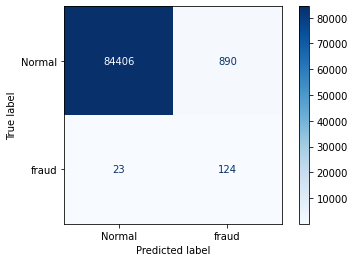

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

labels = ["Normal", "fraud"]

cm = confusion_matrix( tf.argmax(y_test, axis=1),tf.argmax(pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [ ]:
print(classification_report(tf.argmax(y_test, axis=1),tf.argmax(pred, axis=1)))

In [148]:
y_pred = model.predict(X_test_denoised)
pred = tf.nn.softmax(y_pred)
correct_prediction = tf.equal(tf.argmax(pred, axis=1), tf.argmax(y_test, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

2671/2671 [==============================] - 4s 1ms/step


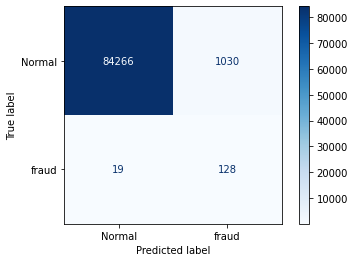

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

labels = ["Normal", "fraud"]

cm = confusion_matrix( tf.argmax(y_test, axis=1),tf.argmax(pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [151]:
print(classification_report(tf.argmax(y_test, axis=1),tf.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.11      0.87      0.20       147

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [23]:
y_pred = model.predict(X_train_denoised)
pred = tf.nn.softmax(y_pred)

12439/12439 [==============================] - 20s 2ms/step


In [40]:

y_pred = model.predict(X_train_denoised)
pred = tf.nn.softmax(y_pred)
prec, rec, tre = precision_recall_curve(tf.argmax(y_train_res, axis=1),pred[:,1] )



12439/12439 [==============================] - 18s 1ms/step


In [44]:
prec, rec, tre = precision_recall_curve(tf.argmax(pred, axis=1), tf.argmax(y_test, axis=1) )

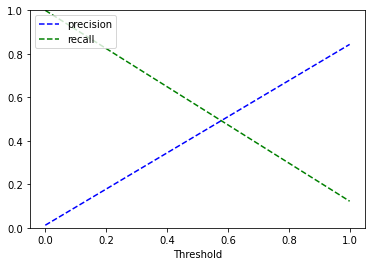

In [45]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
X_test_denoised = pd.read_csv('drive/My Drive/X_test_denoised.csv')
X_train_denoised = pd.read_csv('drive/My Drive/X_train_denoised.csv')


In [ ]:
np.savetxt('drive/My Drive/y_test.csv', y_test, delimiter=',')
np.savetxt('drive/My Drive/y_train_res.csv', y_train_res, delimiter=',')
np.savetxt('drive/My Drive/X_test_noised.csv', X_test_noised, delimiter=',')
np.savetxt('drive/My Drive/X_train_noised.csv', X_train_noised, delimiter=',')

In [ ]:
np.savetxt('drive/My Drive/X_test_denoised.csv', X_test_denoised, delimiter=',')

In [ ]:
np.savetxt('drive/My Drive/X_train_denoised.csv', X_train_denoised, delimiter=',')

In [ ]:
y_test=pd.read_csv('drive/My Drive/y_test.csv')
y_train_res=pd.read_csv('drive/My Drive/y_train_res.csv')

In [ ]:
# load json and create model
json_file = open('drive/My Drive/NNmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("drive/My Drive/NNmodel.h5")
print("Loaded model from disk")

Loaded model from disk


# **With unbalanced dataset**

In [46]:
X=df.copy()

y=df.copy()


del X["Class"]
y=y["Class"]
y = np.expand_dims(y, axis=1)
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


In [48]:
import tensorflow as tf

# Building the Classifier network
model = Sequential()
model.add(Dense(22, input_dim=29, activation='leaky_relu'))
model.add(Dense(15, activation='leaky_relu'))
model.add(Dense(10, activation='leaky_relu'))
model.add(Dense(5, activation='leaky_relu'))
model.add(Dense(2, activation='leaky_relu'))


opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss ="binary_crossentropy")
fname = "weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1) 
# Training the network
model.fit(X_train, y_train, 
                batch_size = 32, epochs = 35,callbacks=[checkpoint], validation_data=(X_test, y_test))


Epoch 1/35
6223/6231 [============================>.] - ETA: 0s - loss: 0.0266
Epoch 1: val_loss improved from inf to 0.02654, saving model to weights.01-0.03.hdf5
6231/6231 [==============================] - 24s 4ms/step - loss: 0.0268 - val_loss: 0.0265
Epoch 2/35
6230/6231 [============================>.] - ETA: 0s - loss: 0.0267
Epoch 2: val_loss did not improve from 0.02654
6231/6231 [==============================] - 30s 5ms/step - loss: 0.0267 - val_loss: 0.0265
Epoch 3/35
6215/6231 [============================>.] - ETA: 0s - loss: 0.0267
Epoch 3: val_loss did not improve from 0.02654
6231/6231 [==============================] - 24s 4ms/step - loss: 0.0267 - val_loss: 0.0265
Epoch 4/35
6231/6231 [==============================] - ETA: 0s - loss: 0.0267
Epoch 4: val_loss did not improve from 0.02654
6231/6231 [==============================] - 24s 4ms/step - loss: 0.0267 - val_loss: 0.0265
Epoch 5/35
6231/6231 [==============================] - ETA: 0s - loss: 0.0267
Epoch 5: va

In [57]:
y_pred = model.predict(X_test)
pred = tf.nn.softmax(y_pred)
correct_prediction = tf.equal(tf.argmax(pred, axis=1), tf.argmax(y_test, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

2671/2671 [==============================] - 4s 1ms/step


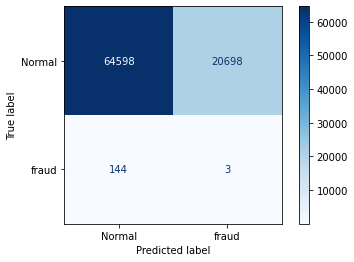

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

labels = ["Normal", "fraud"]

cm = confusion_matrix( y_test,tf.argmax(pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [61]:
print(classification_report(y_test,tf.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     85296
           1       0.00      0.02      0.00       147

    accuracy                           0.76     85443
   macro avg       0.50      0.39      0.43     85443
weighted avg       1.00      0.76      0.86     85443



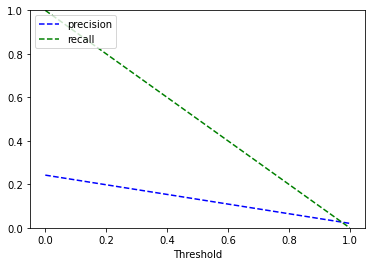

In [62]:
prec, rec, tre = precision_recall_curve(tf.argmax(pred, axis=1), y_test )
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()